In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imgw_api import get_hydro_metadata,get_meteo_metadata

In [2]:
def get_map_wojewodztwa():
    return gpd.read_file("../static_data/wojewodztwa")
def get_map_rzeki():
    return gpd.read_file("../static_data/Rzeki").to_crs("EPSG:2180")

Wyciąganie meta danych jest parametryzowane. 

- True -> dane będą odfiltrowane (2010> & zmapowane do rzeczywistych danych)
- False -> dane nie filtrowane

In [3]:
gdf_h = get_hydro_metadata(True)
gdf_m = get_meteo_metadata()
woj = get_map_wojewodztwa()
rzeki = get_map_rzeki()
# Clip rivers to voivodeship boundary
rzeki = gpd.clip(rzeki, woj)

In [4]:
gdf_m

,Station Code,Station Name,Lon,Lat,geometry
0,252210290,RYBIENKO,21.429167,52.577778,POINT (664545.901 526326.119)
1,351230497,WŁODAWA,23.529444,51.553333,POINT (813865.629 419371.773)
2,352220385,SIEDLCE,22.244722,52.181111,POINT (721755.946 484409.713)
3,250240010,STRZYŻÓW,24.035556,50.840000,POINT (854357.945 342430.384)
4,352230399,TERESPOL,23.621944,52.078611,POINT (816563.802 478131.955)
...,...,...,...,...,...
761,250190850,TROKS,19.635833,50.303889,POINT (545266.654 270940.231)
762,252140070,BOLESZKOWICE,14.566667,52.726944,POINT (200773.192 549362.851)
763,252190240,TRĘBKI,19.540556,52.320278,POINT (536832.852 495059.236)
764,251190150,DOBRYSZYCE,19.428333,51.138889,POINT (529957.081 363656.987)


C:\Users\Tymek\AppData\Local\Temp\ipykernel_15452\1016407429.py:30: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


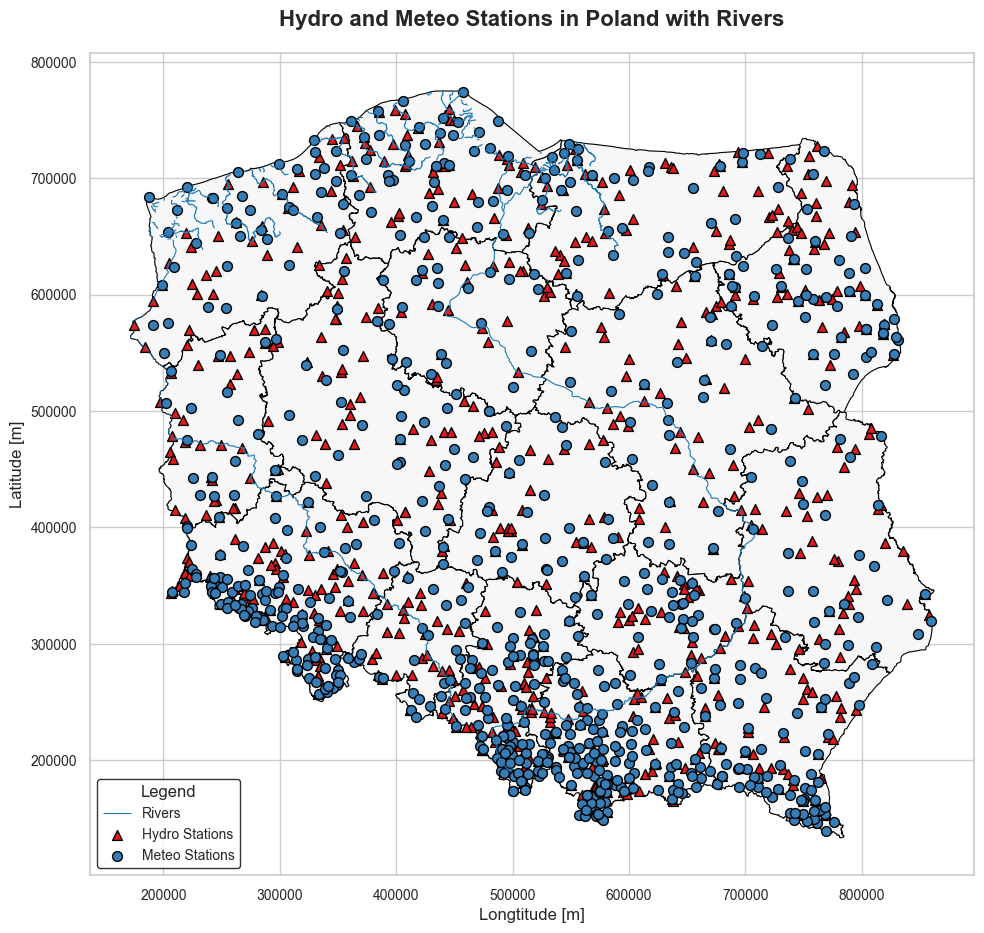

In [5]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_h.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Plot meteo stations (circles)
gdf_m.plot(ax=ax, color="#377eb8", edgecolor="black", marker='o', markersize=50, label='Meteo Stations')

# Title
ax.set_title("Hydro and Meteo Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


C:\Users\Tymek\AppData\Local\Temp\ipykernel_15452\2452108411.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


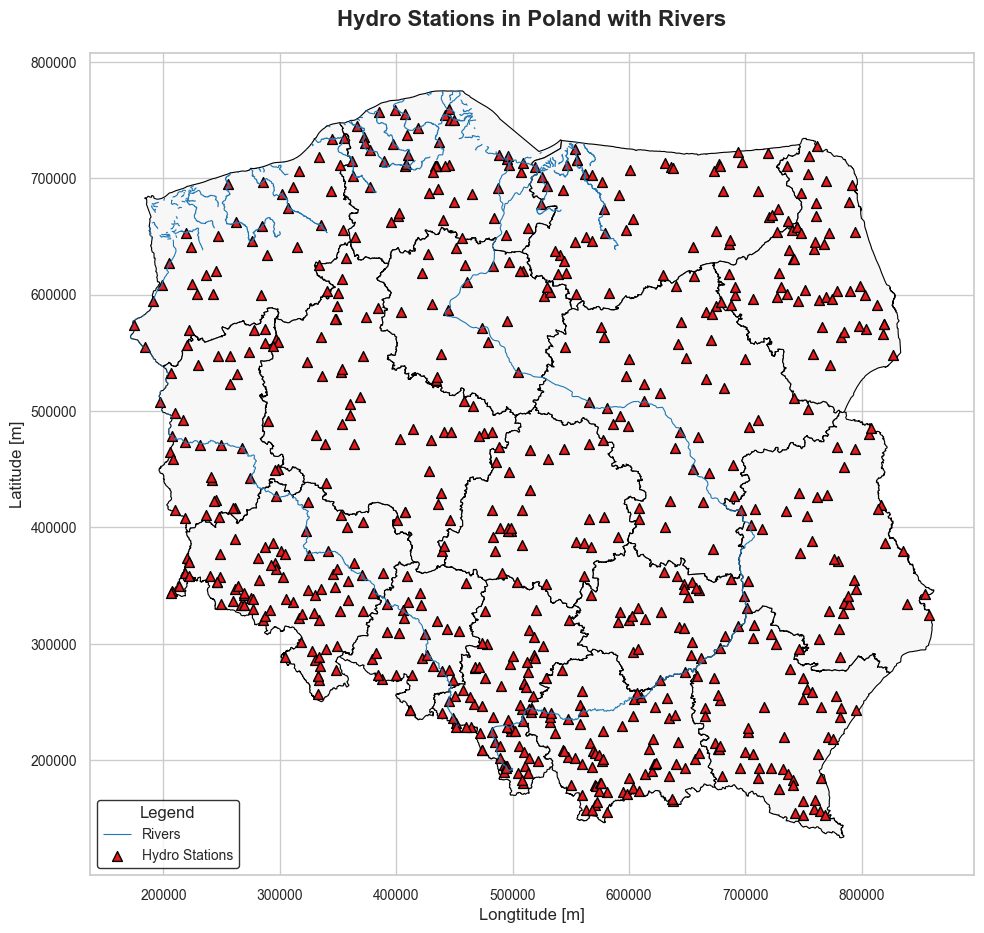

In [6]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_h.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Title
ax.set_title("Hydro Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

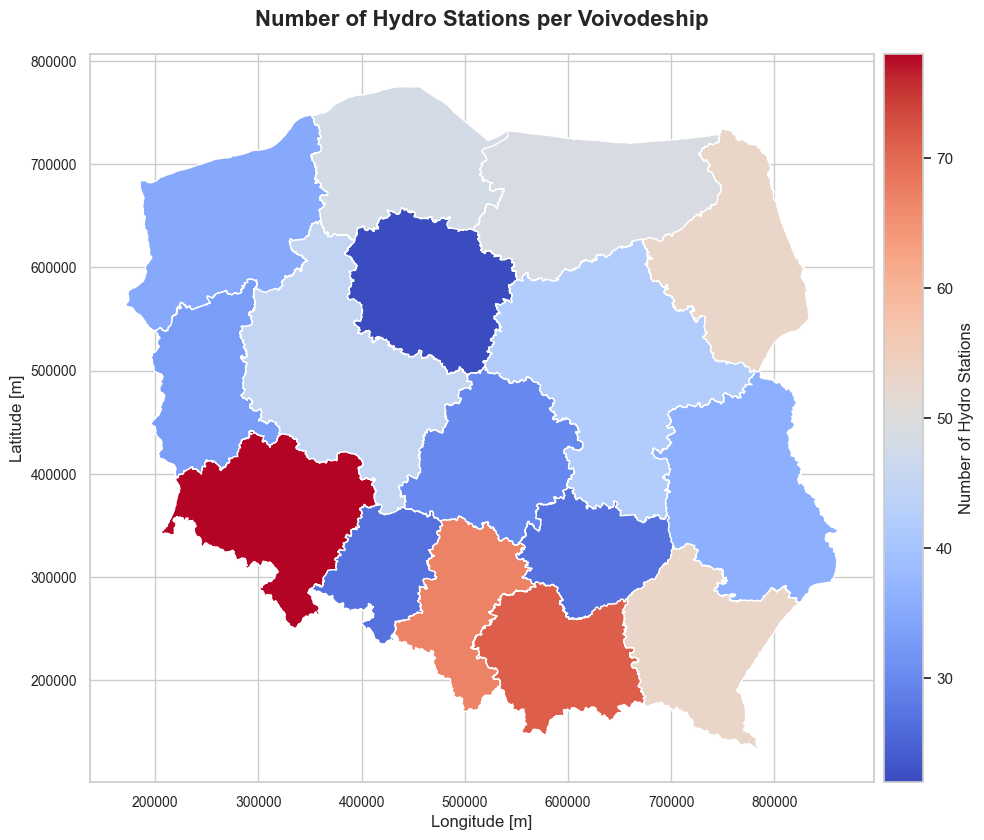

In [7]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# The count of station per voivodeship
station_counts = gpd.sjoin(gdf_h, woj, how="inner", predicate='within')
counts_by_voivodeship_h = station_counts.groupby('JPT_NAZWA_').size()
woj['hydro_count'] = woj['JPT_NAZWA_'].map(counts_by_voivodeship_h)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
cmap = 'coolwarm'
column = 'hydro_count'
woj_plot = woj.plot(column=column, cmap=cmap, ax=ax, legend=False)

# Create a divider for colorbar placement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Normalize values and create ScalarMappable
norm = mpl.colors.Normalize(vmin=woj[column].min(), vmax=woj[column].max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack to make colorbar work

# Create colorbar with 80% height
cb = plt.colorbar(sm, cax=cax, orientation="vertical")
cb.ax.set_position([cb.ax.get_position().x0,
                    cb.ax.get_position().y0 + 0.1,  # move up
                    cb.ax.get_position().width,
                    cb.ax.get_position().height * 0.8])  # scale height

cb.set_label('Number of Hydro Stations', fontsize=12)

# Title
ax.set_title("Number of Hydro Stations per Voivodeship", fontsize=16, fontweight='bold', pad=20)

# Axis labels
ax.set_xlabel("Longitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

C:\Users\Tymek\AppData\Local\Temp\ipykernel_15452\1135224744.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


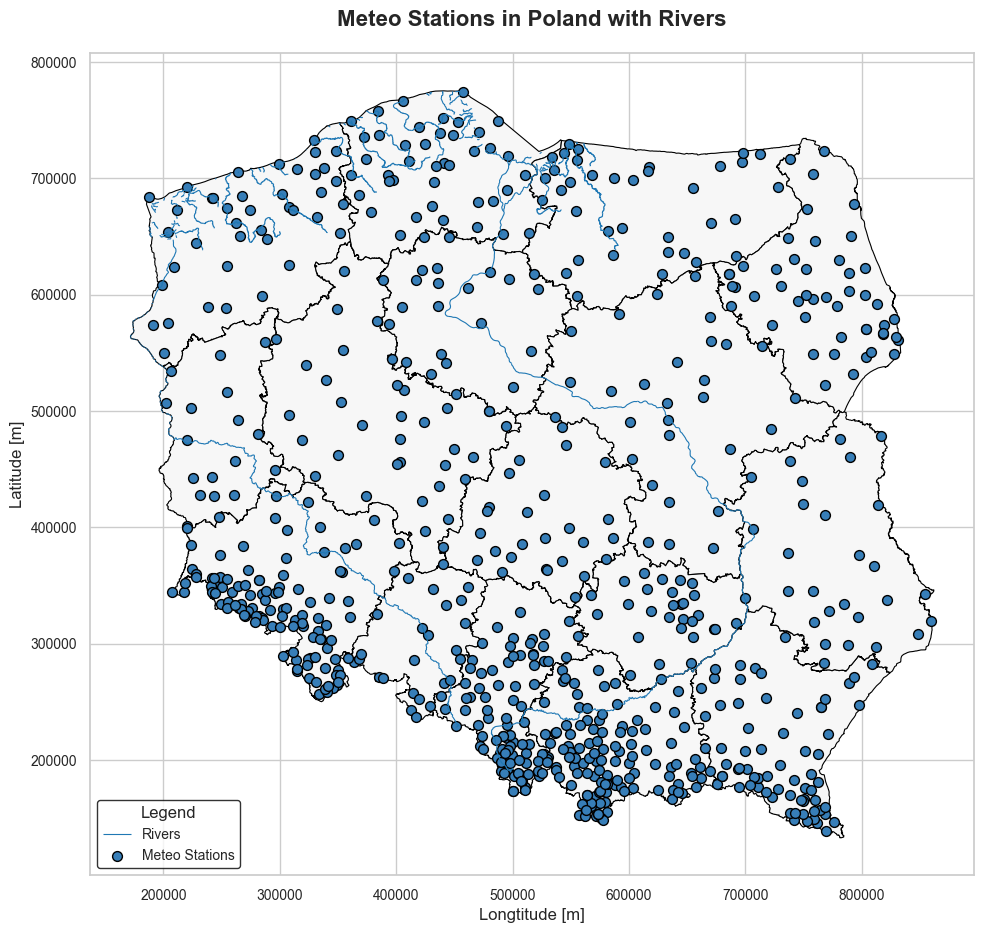

In [8]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
gdf_m.plot(ax=ax, color="#377eb8", edgecolor="black", marker='o', markersize=50, label='Meteo Stations')

# Title
ax.set_title("Meteo Stations in Poland with Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

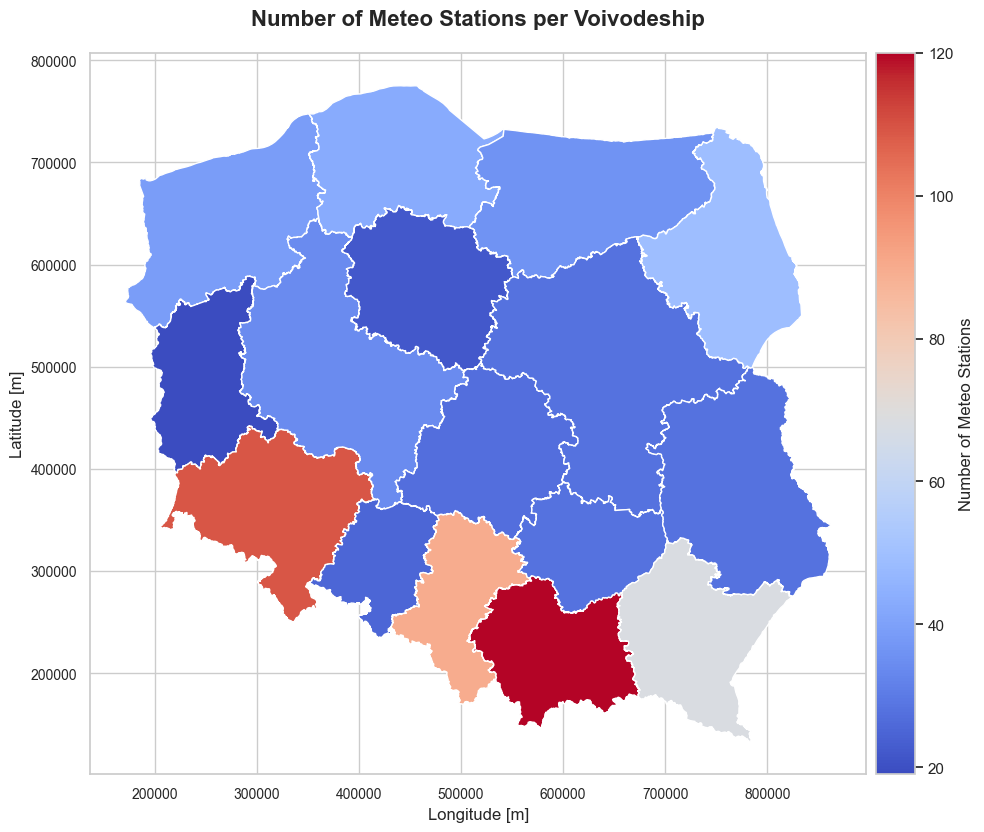

In [9]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

# The count of stations per voivodeship
station_counts = gpd.sjoin(gdf_m, woj, how="inner", predicate='within')
counts_by_voivodeship_m = station_counts.groupby('JPT_NAZWA_').size()
woj['meteo_count'] = woj['JPT_NAZWA_'].map(counts_by_voivodeship_m)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the choropleth map
cmap = 'coolwarm'
column = 'meteo_count'
woj_plot = woj.plot(column=column, cmap=cmap, ax=ax, legend=False)

# Create a divider for colorbar placement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Normalize values and create ScalarMappable
norm = mpl.colors.Normalize(vmin=woj[column].min(), vmax=woj[column].max())
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # Hack to make colorbar work

# Create colorbar with 80% height
cb = plt.colorbar(sm, cax=cax, orientation="vertical")
cb.ax.set_position([cb.ax.get_position().x0,
                    cb.ax.get_position().y0 + 0.1,  # move up
                    cb.ax.get_position().width,
                    cb.ax.get_position().height * 0.8])  # scale height

cb.set_label('Number of Meteo Stations', fontsize=12)

# Title
ax.set_title("Number of Meteo Stations per Voivodeship", fontsize=16, fontweight='bold', pad=20)

# Axis labels
ax.set_xlabel("Longitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [10]:
# Set a threshold (in meters)
distance_threshold = 1000

# Compute the minimum distance from each station to the river network
gdf_h['min_dist_to_river'] = gdf_h.geometry.apply(lambda point: rzeki.distance(point).min())

# Filter only stations within threshold
stations_near_rivers = gdf_h[gdf_h['min_dist_to_river'] <= distance_threshold]

C:\Users\Tymek\AppData\Local\Temp\ipykernel_15452\466799980.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  legend = ax.legend(loc='lower left', fontsize=10, frameon=True,


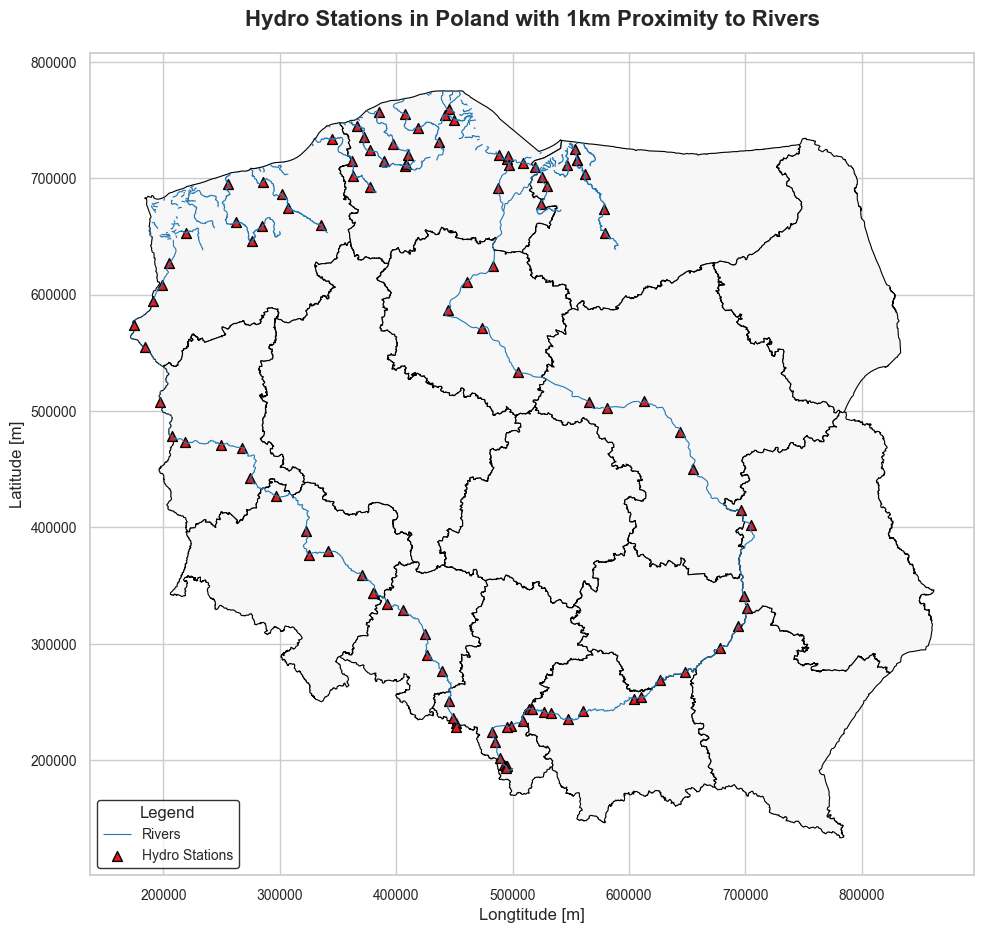

In [11]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot voivodeships
woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

# Plot rivers
rzeki.plot(ax=ax, color="#1f78b4", linewidth=0.8, label='Rivers')

# Plot hydro stations (triangles)
stations_near_rivers.plot(ax=ax, color="#e41a1c", edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

# Title
ax.set_title("Hydro Stations in Poland with 1km Proximity to Rivers", fontsize=16, fontweight='bold', pad=20)

# Axis labels with units
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)

# Customize ticks for readability
ax.tick_params(labelsize=10)

# Add legend
legend = ax.legend(loc='lower left', fontsize=10, frameon=True,
                   facecolor='white', edgecolor='black',
                   title='Legend', title_fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

In [12]:
zlewnie = gpd.read_file('../static_data/zlewnie/zlewnie_2.gpkg')

gdf_h_zlew = gpd.sjoin(gdf_h, zlewnie, how="inner", predicate='within').iloc[:,:10].drop('pow',axis=1)
gdf_m_zlew = gpd.sjoin(gdf_m, zlewnie, how="inner", predicate='within').iloc[:,:9].drop('pow',axis=1)

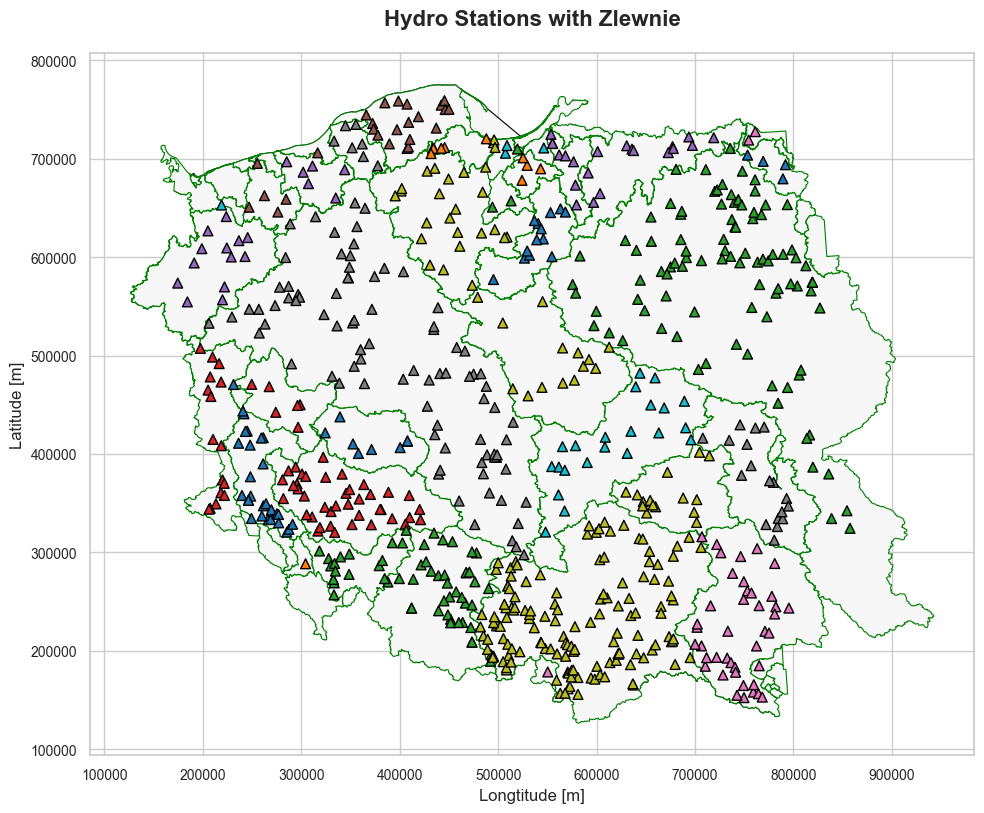

In [17]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

zlewnie.plot(ax=ax,color="#f7f7f7",edgecolor="green", linewidth=0.8, label='Zlewnie')

gdf_h_zlew.plot(ax=ax, column='naz_zlewni', edgecolor="black", marker='^', markersize=50, label='Hydro Stations')

ax.set_title("Hydro Stations with Zlewnie", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

In [14]:
gdf_h_zlew.groupby("naz_zlewni")['Station Name'].count()

naz_zlewni
Barycz                                      8
Bóbr                                       29
Czarna Hańcza (l)                           4
Drwęca                                     13
Elbląg                                      4
Martwa Wisła                                7
Metuje                                      1
Narew                                      94
Nogat                                       3
Nysa Kłodzka                               18
Odra do Nysy Kłodzkiej (l)                 38
Odra od Baryczy do Bobru (l)                6
Odra od Bobru do Warty (p)                 16
Odra od Nysy Kłodzkiej do Baryczy (p)      40
Odra od Warty do ujścia                    13
Parsęta                                     6
Pasłęka                                     8
Pregoła                                    13
Przymorze od Parsęty do Wieprzy             1
Przymorze od Wieprzy do Martwej Wisły      19
Rega                                        5
San                    

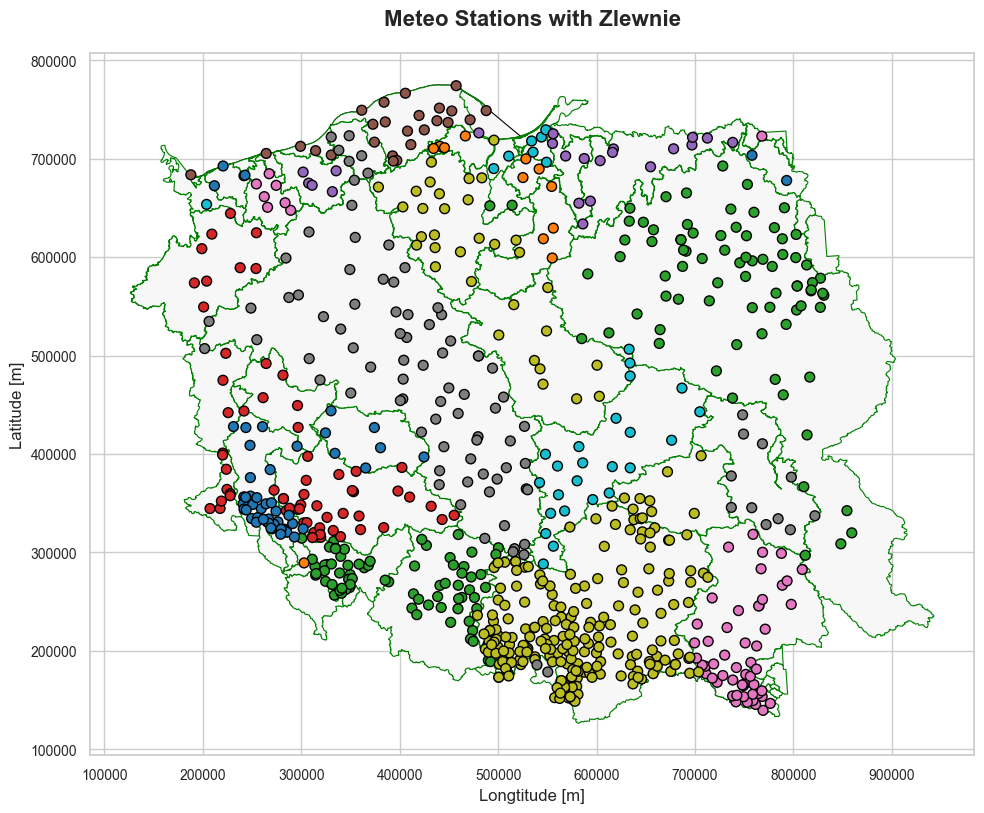

In [18]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

woj.plot(ax=ax, color="#f7f7f7", edgecolor="black", linewidth=0.8, label='Voivodeships')

zlewnie.plot(ax=ax,color="#f7f7f7",edgecolor="green", linewidth=0.8, label='Zlewnie')

gdf_m_zlew.plot(ax=ax, column='naz_zlewni', edgecolor="black", marker='o', markersize=50, label='Meteo Stations')

ax.set_title("Meteo Stations with Zlewnie", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Longtitude [m]", fontsize=12)
ax.set_ylabel("Latitude [m]", fontsize=12)
ax.tick_params(labelsize=10)



plt.tight_layout()
plt.show()

In [16]:
gdf_m_zlew.groupby("naz_zlewni")['Station Name'].count()

naz_zlewni
Barycz                                                                 7
Bóbr                                                                  40
Cieśnina Dziwna                                                        4
Czarna Hańcza (l)                                                      2
Drwęca                                                                 4
Elbląg                                                                 3
Martwa Wisła                                                           4
Metuje                                                                 1
Narew                                                                 77
Nogat                                                                  2
Nysa Kłodzka                                                          34
Odra do Nysy Kłodzkiej (l)                                            41
Odra od Baryczy do Bobru (l)                                           6
Odra od Bobru do Warty (p)              